<a href="https://colab.research.google.com/github/entc-17-fyp-20/CM_Data_Visualizing/blob/akeshala/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**

## Importing

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed

In [40]:
# from google.colab import drive
# drive.mount('/content/drive') #, force_remount=True

In [41]:
url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv

## Interpolation - For active power


*   A sample power curve was created observing datasheet
*   Using interpolation a function was developed for power curve
*   Outliers were removed from "Active Power kW" column

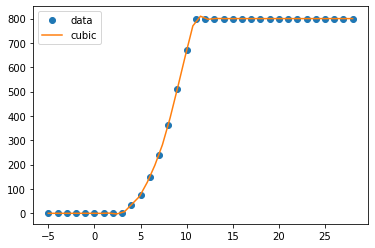



In [42]:
from scipy.interpolate import interp1d

x = np.linspace(-5, 28, num=34, endpoint=True)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 75, 150, 240, 362.5, 512.5, 670, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800])
f = interp1d(x, y, kind='cubic') # creating function

In [43]:
# xnew = np.linspace(-5, 28, num=41, endpoint=True)
# import matplotlib.pyplot as plt
# plt.plot(x, y, 'o', xnew, f(xnew))
# plt.legend(['data', 'cubic'], loc='best')
# plt.show()

In [44]:
#@title Set error margin { display-mode: "form" }

error_margin = 0.45 #@param {type:"slider", min:0.1, max:0.6, step:0.05}

def fil(x):
  return int(f(x))

def compare(x):
  actual = x["Active Power kW"]
  calculated = x["Power_cal"]

  if calculated == 0:
    error = abs(actual-calculated)/0.001
    if error>error_margin:
      return calculated
    return actual

  error = abs(actual-calculated)/calculated
  if error>error_margin:
    return calculated
  return actual

def addcol(x):
  actual = x["Active Power kW"]
  calculated = x["Power_cal"]

  if calculated == 0:
    error = abs(actual-calculated)/0.001
    if error>error_margin:
      return "replaced"
    return "actual"

  error = abs(actual-calculated)/calculated
  if error>error_margin:
    return "replaced"
  return "actual"

## Inter Quartile Range and Standard Deviation Fuctions

In [ ]:
def IQR(df, feature='Gearbox oil Temperature'):
  Q1 = df4[feature].quantile(0.25)
  Q3 = df4[feature].quantile(0.75)
  lower_limit = Q1 - 1.5*(Q3-Q1)
  upper_limit = Q3 + 1.5*(Q3-Q1)
  # print(lower_limit, upper_limit)
  return lower_limit, upper_limit

def STD(df, feature='Gearbox oil Temperature')
  upper_limit = df4[feature].mean() + 3*df4[feature].std()
  lower_limit = df4[feature].mean() - 3*df4[feature].std()
  # print(lower_limit, upper_limit)
  return lower_limit, upper_limit
#df4[(df4['Generator RPM']<lower_limit)|(df4['Generator RPM']>upper_limit)]

#V08 June

190080 non-null data points

In [ ]:
df4 = pd.read_csv(url4)

In [46]:
df4['Date & Time'] = pd.to_datetime(df4['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df4.set_index('Date & Time', inplace = True)
df4 = df4.resample('10min').mean().reset_index()

In [47]:
df4 = df4[df4['Generator RPM']>0] # Removing rows with zero Generator RPM

In [ ]:
# lower_limit, upper_limit = IQR(df4, 'Gearbox oil Temperature')
# # df4 = df4[df4['Gearbox oil Temperature']>0] # Removing rows with negative temperatures
# df4[(df4['Gearbox oil Temperature']<lower_limit)|(df4['Gearbox oil Temperature']>upper_limit)] # Removing using IQR or std

In [ ]:
# lower_limit, upper_limit = IQR(df4, 'Nacelle Temperature')
# df4[(df4['Nacelle Temperature']<lower_limit)|(df4['Nacelle Temperature']>upper_limit)] # Removing using IQR or std

In [48]:
df4["Power_cal"] = df4["Wind Speed m/s"].apply(fil) # calculating power from wind speed
df4["Power_act"] = df4.apply(compare, axis=1) # Replacing outliers with calculated power
df4["Power_cate"] = df4.apply(addcol, axis=1) # Addting outlier/not outlier column

In [49]:
df4["voltage"] = (df4["Voltage Phase R"] + df4["Voltage Phase  S"]+ df4["Voltage Phase T"])/3
#df4["current"]  = (df4["Current Phase R"] + df4["Current Phase  S"]+ df4["Current Phase T"])/3
df4["Gearbox & Bearing temp"]  = (df4["Gearbox Bearing Temperature"] + df4["Gearbox oil Temperature"]+ df4["Generator Winding Temperature Phase R"]+df4["Generator Winding Temperature Phase S"]+df4["Generator Winding Temperature Phase T"]+df4["Main bearing Temperature"] + df4["Generator Bearing Temperature DE"]+ df4["Generator Bearing Temperature NDE"])/8

df4.drop(["Reactive Power kVAR", "Frequency Hz","Voltage Phase R","Voltage Phase  S","Voltage Phase T","Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE"], axis='columns', inplace=True)

In [ ]:
df4

In [50]:
df4.to_csv('drive/MyDrive/DatasetsWind/V08June1.csv', index=False)

#V08 July

In [52]:
df6 = pd.read_csv(url6)

In [53]:
df6['Date & Time'] = pd.to_datetime(df6['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df6.set_index('Date & Time', inplace = True)
df6 = df6.resample('10min').mean().reset_index()

In [54]:
df6 = df6[df6['Generator RPM']>0] # Removing rows with zero Generator RPM

In [55]:
df6["Power_cal"] = df6["Wind Speed m/s"].apply(fil) # calculating power from wind speed
df6["Power_act"] = df6.apply(compare, axis=1) # Replacing outliers with calculated power
df6["Power_cate"] = df6.apply(addcol, axis=1) # Addting outlier/not outlier column

In [56]:
df6["voltage"] = (df6["Voltage Phase R"] + df6["Voltage Phase  S"]+ df6["Voltage Phase T"])/3
df6["current"]  = (df6["Current Phase R"] + df6["Current Phase S"]+ df6["Current Phase T"])/3
df6["Gearbox & Bearing temp"]  = (df6["Gearbox Bearing Temperature"] + df6["Gearbox oil Temperature"]+ df6["Generator Winding Temperature Phase R"]+df6["Generator Winding Temperature Phase S"]+df6["Generator Winding Temperature Phase T"]+df6["Main bearing Temperature"] + df6["Generator Bearing Temperature DE"]+ df6["Generator Bearing Temperature NDE"])/8


df6.drop(["Reactive Power kVAR", "Frequency Hz","Voltage Phase R","Voltage Phase  S","Voltage Phase T","Current Phase R","Current Phase S","Current Phase T","Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE"], axis='columns', inplace=True)

In [ ]:
df6

In [57]:
df6.to_csv('drive/MyDrive/DatasetsWind/V08July1.csv', index=False)

# V13 June

In [ ]:
df5 = pd.read_csv(url5)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190038 entries, 0 to 190037
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date & Time                        190038 non-null  object 
 1   Voltage Phase R                    190038 non-null  float64
 2   Voltage Phase S                    190038 non-null  float64
 3   Voltage Phase T                    190038 non-null  float64
 4   Frequency Hz                       190038 non-null  float64
 5   Current Phase R                    190038 non-null  float64
 6   Current Phase S                    190038 non-null  float64
 7   Current Phase T                    190038 non-null  float64
 8   Reactive Power kVAR                190038 non-null  float64
 9   Active Power kW                    190038 non-null  float64
 10  Wind Speed m/s                     190038 non-null  float64
 11  Nacelle Temperature                1900

In [ ]:
df5["voltage"] = (df5["Voltage Phase R"] + df5["Voltage Phase S"]+ df5["Voltage Phase T"])/3
df5["current"]  = (df5["Current Phase R"] + df5["Current Phase S"]+ df5["Current Phase T"])/3
df5["Gearbox & Bearing temp"]  = (df5["Gearbox Bearing Temperature"] + df5["Gearbox oil Temperature"]+ df5["Generator Winding Temperature R"]+df5["Generator Winding Temperature S"]+df5["Generator Winding Temperature T"]+df5["Main bearing Temperature"] + df5["Generator Bearing Temperature DE"]+ df5["Generator Bearing Temperature NDE"])/8


df5.drop(["Reactive Power kVAR", "Frequency Hz","Voltage Phase R","Voltage Phase S","Voltage Phase T","Current Phase R","Current Phase S","Current Phase T","Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature R","Generator Winding Temperature S","Generator Winding Temperature T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE"], axis='columns', inplace=True)

In [ ]:
df5

,Date & Time,Active Power kW,Wind Speed m/s,Nacelle Temperature,Ambient Temperature,Hydraulic unit Pressure in bar,Hydraulic oil Temperature,Generator RPM,voltage,current,Gearbox & Bearing temp
0,02/06/2021 00:00:00,385.9,8.4,30.8,30.6,168.8,45.9,1408.4,574.700000,231.500000,82.8000
1,02/06/2021 00:00:10,299.0,8.3,30.8,30.6,172.3,45.8,1392.7,574.000000,187.533333,82.7375
2,02/06/2021 00:00:20,344.3,8.2,30.8,30.5,168.0,45.8,1439.5,574.766667,195.200000,82.9000
3,02/06/2021 00:00:30,426.5,8.4,30.8,30.5,173.9,45.9,1491.7,575.133333,248.866667,82.6875
4,02/06/2021 00:00:40,546.0,9.2,30.8,30.6,166.8,45.8,1497.7,575.533333,309.733333,82.8250
...,...,...,...,...,...,...,...,...,...,...,...
190033,30/06/2021 23:43:10,472.0,8.7,30.6,30.9,171.6,45.5,1335.1,573.000000,285.333333,82.0375
190034,30/06/2021 23:43:20,422.0,8.5,30.7,30.8,167.9,45.6,1395.9,573.866667,257.200000,81.9375
190035,30/06/2021 23:43:30,489.2,8.4,30.6,30.7,174.8,45.5,1466.2,572.133333,294.466667,81.9375
190036,30/06/2021 23:43:40,521.4,9.2,30.7,30.6,166.5,45.5,1466.2,574.100000,314.466667,81.8250


In [ ]:
df5.to_csv('drive/MyDrive/DatasetsWind/V13June.csv', index=False)

# V13 July

In [ ]:
df7 = pd.read_csv(url7)
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186493 entries, 0 to 186492
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Date & Time                            186493 non-null  object 
 1   Voltage Phase R                        186493 non-null  float64
 2   Voltage Phase S                        186493 non-null  float64
 3   Voltage Phase T                        186493 non-null  float64
 4   Current Phase R                        186493 non-null  float64
 5   Current Phase S                        186493 non-null  float64
 6   Current Phase T                        186493 non-null  float64
 7   Frequency Hz                           186493 non-null  float64
 8   Active Power kW                        186493 non-null  float64
 9   Reactive Power kVAR                    186493 non-null  float64
 10  Wind Speed m/s                         186493 non-null  

In [ ]:
df7["voltage"] = (df7["Voltage Phase R"] + df7["Voltage Phase S"]+ df7["Voltage Phase T"])/3
df7["current"]  = (df7["Current Phase R"] + df7["Current Phase S"]+ df7["Current Phase T"])/3
df7["Gearbox & Bearing temp"]  = (df7["Gearbox Bearing Temperature"] + df7["Gearbox oil Temperature"]+ df7["Generator Winding Temperature Phase R"]+df7["Generator Winding Temperature Phase S"]+df7["Generator Winding Temperature Phase T"]+df7["Main bearing Temperature"] + df7["Generator Bearing Temperature DE"]+ df7["Generator Bearing Temperature NDE"])/8


df7.drop(["Reactive Power kVAR", "Frequency Hz","Voltage Phase R","Voltage Phase S","Voltage Phase T","Current Phase R","Current Phase S","Current Phase T","Gearbox Bearing Temperature","Gearbox oil Temperature","Generator Winding Temperature Phase R","Generator Winding Temperature Phase S","Generator Winding Temperature Phase T","Main bearing Temperature","Generator Bearing Temperature DE","Generator Bearing Temperature NDE"], axis='columns', inplace=True)

In [ ]:
df7

,Date & Time,Active Power kW,Wind Speed m/s,Nacelle Temperature,Ambient Temperature,Hydraulic unit Pressure in bar,Hydralic Oil Temperature,Generator RPM,voltage,current,Gearbox & Bearing temp
0,11/07/2021 00:00:00,-4.0,9.2,28.3,27.6,174.6,48.3,43.2,580.066667,1.033333,38.6000
1,11/07/2021 00:00:10,-11.2,9.0,28.3,27.6,163.2,47.8,28.7,580.300000,5.666667,38.5750
2,11/07/2021 00:00:20,-3.9,9.7,28.4,27.6,169.9,47.6,45.1,581.333333,0.966667,38.5750
3,11/07/2021 00:00:30,-11.6,12.9,28.3,27.6,173.4,47.4,39.8,581.433333,5.866667,38.5500
4,11/07/2021 00:00:40,-3.9,9.8,28.3,27.6,166.1,47.2,32.7,580.733333,1.000000,38.5625
...,...,...,...,...,...,...,...,...,...,...,...
186488,01/08/2021 14:01:20,272.0,7.6,29.9,30.7,173.0,49.3,1350.7,565.333333,163.666667,70.3375
186489,01/08/2021 14:01:30,272.4,7.6,29.9,30.8,166.6,49.4,1353.1,565.033333,173.633333,70.3250
186490,01/08/2021 14:01:40,277.4,7.2,29.8,30.9,179.7,49.4,1355.0,563.300000,169.366667,70.4000
186491,01/08/2021 14:01:50,287.0,7.6,29.9,30.9,163.2,49.4,1363.0,563.800000,177.700000,70.4875


In [ ]:
df7.to_csv('drive/MyDrive/DatasetsWind/V13July.csv', index=False)

#AE59_1

In [ ]:
df2 = pd.read_csv(url2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date & Time                             17280 non-null  object 
 1   Wind Speed m/s                          17280 non-null  float64
 2   Active Power kW                         17280 non-null  float64
 3   Reactive Power kVar                     17280 non-null  float64
 4   Volatge- Phase R                        17280 non-null  float64
 5   Volatge- Phase Y                        17280 non-null  float64
 6   Volatge- Phase B                        17280 non-null  float64
 7   Current - Phase R                       17280 non-null  float64
 8   Current - Phase Y                       17280 non-null  float64
 9   Current - Phase B                       17280 non-null  float64
 10  Ambient temperature                     17280 non-null  fl

In [ ]:
df2["voltage"] = (df2["Volatge- Phase R"] + df2["Volatge- Phase B"]+ df2["Volatge- Phase Y"])/3
df2["current"]  = (df2["Current - Phase R"] + df2["Current - Phase B"]+ df2["Current - Phase Y"] +df2["Average Phase current"])/4
df2["Gearbox & Bearing temp"]  = (df2["Gearbox oil Temperature"]+ df2["Generator winding temperature R Phase"]+df2["Generator winding temperature Y Phase"]+df2["Generator winding temperature B Phase"]+ df2["Generator Bearing Temperature DE"]+ df2["Generator Bearing Temperature NDE"]+df2["Gearbox high speed bearing Temperature"])/6


df2.drop(["Reactive Power kVar","Volatge- Phase R","Volatge- Phase Y","Volatge- Phase B","Current - Phase R","Current - Phase B","Current - Phase Y","Gearbox oil Temperature","Generator winding temperature R Phase","Generator winding temperature Y Phase","Generator winding temperature B Phase","Generator Bearing Temperature DE","Generator Bearing Temperature NDE","Average Phase current","Gearbox high speed bearing Temperature"], axis='columns', inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date & Time                17280 non-null  object 
 1   Wind Speed m/s             17280 non-null  float64
 2   Active Power kW            17280 non-null  float64
 3   Ambient temperature        17280 non-null  float64
 4   Nacelle temperature        17280 non-null  float64
 5   Generator RPM              17280 non-null  float64
 6   Hydraulic oil temperature  17280 non-null  float64
 7   voltage                    17280 non-null  float64
 8   current                    17280 non-null  float64
 9   Gearbox & Bearing temp     17280 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


# AE59_2

In [ ]:
df3 = pd.read_csv(url2)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date & Time                             17280 non-null  object 
 1   Wind Speed m/s                          17280 non-null  float64
 2   Active Power kW                         17280 non-null  float64
 3   Reactive Power kVar                     17280 non-null  float64
 4   Volatge- Phase R                        17280 non-null  float64
 5   Volatge- Phase Y                        17280 non-null  float64
 6   Volatge- Phase B                        17280 non-null  float64
 7   Current - Phase R                       17280 non-null  float64
 8   Current - Phase Y                       17280 non-null  float64
 9   Current - Phase B                       17280 non-null  float64
 10  Ambient temperature                     17280 non-null  fl

In [ ]:
df3["voltage"] = (df3["Volatge- Phase R"] + df3["Volatge- Phase B"]+ df3["Volatge- Phase Y"])/3
df3["current"]  = (df3["Current - Phase R"] + df3["Current - Phase B"]+ df3["Current - Phase Y"] +df3["Average Phase current"])/4
df3["Gearbox & Bearing temp"]  = (df3["Gearbox oil Temperature"]+ df3["Generator winding temperature R Phase"]+df3["Generator winding temperature Y Phase"]+df3["Generator winding temperature B Phase"]+ df3["Generator Bearing Temperature DE"]+ df3["Generator Bearing Temperature NDE"]+df3["Gearbox high speed bearing Temperature"])/6


df3.drop(["Reactive Power kVar","Volatge- Phase R","Volatge- Phase Y","Volatge- Phase B","Current - Phase R","Current - Phase B","Current - Phase Y","Gearbox oil Temperature","Generator winding temperature R Phase","Generator winding temperature Y Phase","Generator winding temperature B Phase","Generator Bearing Temperature DE","Generator Bearing Temperature NDE","Average Phase current","Gearbox high speed bearing Temperature"], axis='columns', inplace=True)

In [ ]:
df3

,Date & Time,Wind Speed m/s,Active Power kW,Ambient temperature,Nacelle temperature,Generator RPM,Hydraulic oil temperature,voltage,current,Gearbox & Bearing temp
0,14/07/2018 00:00:00,11.2,773.9,29.1,29.3,1497.0,45.2,584.133333,395.0675,119.016667
1,14/07/2018 00:00:10,11.6,823.3,29.1,29.4,1512.8,45.2,590.466667,461.9675,119.083333
2,14/07/2018 00:00:20,9.9,799.6,29.1,29.4,1492.5,45.3,590.533333,464.1675,119.050000
3,14/07/2018 00:00:30,12.3,829.1,29.1,29.3,1525.9,45.3,590.033333,442.8675,119.200000
4,14/07/2018 00:00:40,12.4,818.4,29.1,29.3,1526.7,45.4,585.400000,467.3325,119.233333
...,...,...,...,...,...,...,...,...,...,...
17275,15/07/2018 23:59:10,10.8,821.8,28.5,29.0,1525.1,45.2,586.266667,456.1000,108.183333
17276,15/07/2018 23:59:20,10.3,782.8,28.5,29.0,1492.5,45.2,589.400000,462.5325,108.200000
17277,15/07/2018 23:59:30,11.0,805.6,28.7,29.1,1491.7,45.3,585.666667,459.4675,108.350000
17278,15/07/2018 23:59:40,10.5,797.8,28.7,29.2,1496.2,45.2,582.100000,465.1675,108.550000
